# <center>实验7 关联规则分析</center>

<B>基本概念</B>

关联规则的目的在于分析项集之间的关系。

$Apriori$算法本质由两部分组成，分别是

1.频繁项集(frequent item sets)发现。包括计算项集的支持度(support)；

2.关联规则(association rules)生成。包括计算规则的置信度(confidence)。

<B>1.频繁项集(frequent item sets)发现</B>

假设下表为一个超市的交易记录

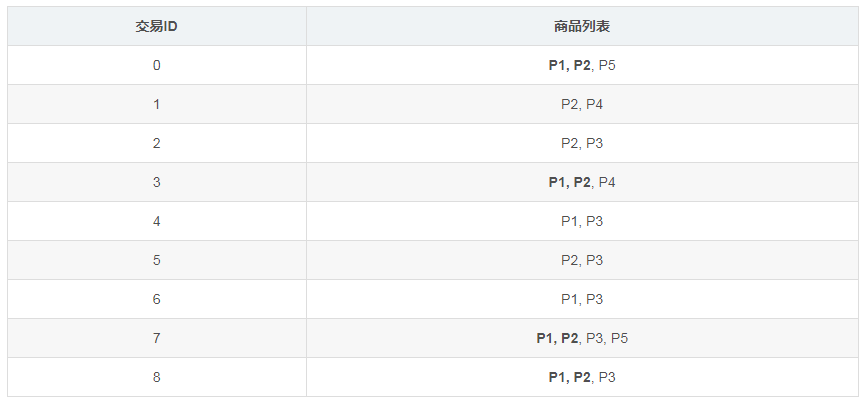

In [6]:
def loadDataSet():
    return [[1,2,5],[2,4],[2,3],[1,2,4],[1,3],[2,3],[1,3],[1,2,3,5],[1,2,3]]

dataset=loadDataSet()
dataset

[[1, 2, 5],
 [2, 4],
 [2, 3],
 [1, 2, 4],
 [1, 3],
 [2, 3],
 [1, 3],
 [1, 2, 3, 5],
 [1, 2, 3]]

<B>1.1 频繁项集的支持度(support)和阈值</B>

一个项集的支持度被定义为数据集中包含该项集的记录所占的比例，比如在上表中，9个购物记录中有4个购买了P1商品和P2商品，项集{P1,P2}的支持度计数就是4，项集{P1,P2}的支持度就是4/9 = 0.44。

对于小于给定支持度阈值的项集，认为是非频繁的，也就没有挖掘关联规则的意义，因此不会进行后续的计算。

<B>1.2 频繁项集支持度计算方法</B>

频繁项集的计算主要就是三步的不断循环：

1.利用当前频繁项集得到新的候选项集

2.对得到的所有候选项进行支持度的计算

3.使用阈值过滤掉不符合要求的候选项，最终剩下的成为新的频繁项

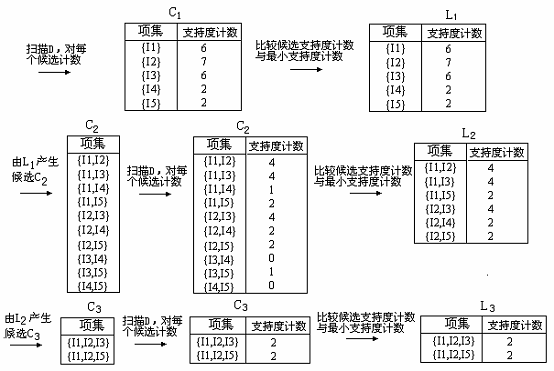

In [23]:
#构建长度为1的候选项集C1
def generate_candidates_length_1(data):
    candidates = []
    temp = []
    for i in range(0,len(data)):
        for j in data[i]:
            if j not in temp:
                temp.append(j)
    for i in temp:
        candidates.append([i])
    return candidates


# 生成长度为1的候选集
candidates = generate_candidates_length_1(dataset)
candidates.sort()

# 打印候选集
print("长度为1的候选集：")
for candidate in candidates:
    print(candidate)


长度为1的候选集：
[1]
[2]
[3]
[4]
[5]


In [196]:
#使用阈值minsup对候选项集进行筛选
def generate_frequent_itemsets(candidates, data, min_support):
    frequent_itemsets = []
    support_data = {}  # 用于存储每个频繁项集的支持度计数

    # 统计每个候选项集的计数
    #补充自己的代码
    for c in candidates:
        for t in data:
            if all(item in t for item in c):
                c_tuple = tuple(c)
                if c_tuple not in support_data:
                    support_data[c_tuple] = 1
                else :
                    support_data[c_tuple]+=1
    # 计算支持度并筛选出频繁项集
    #补充自己的代码
    remove = []
    n = len(data)
    for c,cnt in support_data.items():
        sup = cnt/n
        if sup >= min_support:
            frequent_itemsets.append(list(c))
        else:
            remove.append(c)
    for c in remove:
        support_data.pop(c,None)
    return frequent_itemsets, support_data #输出频繁项集和支持度计数



In [198]:
#从长度为k的频繁集生成长度为k+1的候选集
def generate_candidate_itemsets(frequent_itemsets):
    candidate_itemsets = []

    # 遍历所有的频繁集
    #补充自己的代码
    for f1 in frequent_itemsets:
        for f2 in frequent_itemsets:
           if f1[:-1] == f2[:-1] and f1[-1]!=f2[-1]:
               new_candidate = f1 + [f2[-1]]
               new_candidate.sort()
               if new_candidate not in candidate_itemsets:
                   candidate_itemsets.append(new_candidate)
    
    return candidate_itemsets



In [200]:

k = 1 
minsup = 2/9   #最小支持度阈值

#生成长度为1的候选集
candidates = generate_candidates_length_1(dataset)
candidates.sort()
print(f"Candidate itemsets of length {k}: {candidates}")

# 不断执行直到无法生成新的频繁项集
while True:

    #使用阈值minsup对候选项集进行筛选
    frequent_itemsets, support_data = generate_frequent_itemsets(candidates, dataset, minsup)
    frequent_itemsets.sort()
    print(f"Frequent itemsets of length {k}: {frequent_itemsets}")
    for itemset in frequent_itemsets:
        print(f"Itemset: {itemset}, Support: {support_data[tuple(itemset)]}")
    
    #如果频繁集为空，终止循环
    if len(frequent_itemsets) == 0:
        break
    
    k += 1
    
    #从长度为k的频繁集生成长度为k+1的候选集
    candidates = generate_candidate_itemsets(frequent_itemsets)
    candidates.sort()
    print(f"Candidate itemsets of length {k}: {candidates}")


Candidate itemsets of length 1: [[1], [2], [3], [4], [5]]
Frequent itemsets of length 1: [[1], [2], [3], [4], [5]]
Itemset: [1], Support: 6
Itemset: [2], Support: 7
Itemset: [3], Support: 6
Itemset: [4], Support: 2
Itemset: [5], Support: 2
Candidate itemsets of length 2: [[1, 2], [1, 3], [1, 4], [1, 5], [2, 3], [2, 4], [2, 5], [3, 4], [3, 5], [4, 5]]
Frequent itemsets of length 2: [[1, 2], [1, 3], [1, 5], [2, 3], [2, 4], [2, 5]]
Itemset: [1, 2], Support: 4
Itemset: [1, 3], Support: 4
Itemset: [1, 5], Support: 2
Itemset: [2, 3], Support: 4
Itemset: [2, 4], Support: 2
Itemset: [2, 5], Support: 2
Candidate itemsets of length 3: [[1, 2, 3], [1, 2, 5], [1, 3, 5], [2, 3, 4], [2, 3, 5], [2, 4, 5]]
Frequent itemsets of length 3: [[1, 2, 3], [1, 2, 5]]
Itemset: [1, 2, 3], Support: 2
Itemset: [1, 2, 5], Support: 2
Candidate itemsets of length 4: [[1, 2, 3, 5]]
Frequent itemsets of length 4: []
